# SIXT33N Phase 4: Controls

### EE16B: Designing Information Devices and Systems II, Summer 2020

-----

# Table of Contents



* [Part 0: Lab Note](#part0)
* [Part 1: Jolt Calculation](#part1)
* [Part 2: Closed Loop Control](#part2)
    * [2.0: Closed Loop Design](#part20)
    * [2.1: Closed Loop Simulation and k-Value Selection](#part21)
    * [2.2: Closed Loop Implementation](#part22)
    * [2.3: k-Value Tuning](#part23)
    * [2.4: Steady-State Error Correction](#part24)
* [Part 3 (OPTIONAL): Open Loop Comparison](#part3) 
* [Part 4: Turning](#part4)
    * [4.0: Analyzing A Turn](#part20)
    * [4.1: Implementing Turns](#part21)
    * [4.2: Correcting Mechanical Error](#part22)




<a id='part0'></a>
# <span style="color:navy">Part 0: Lab Note</span>
-----

### Please read the [lab note](https://drive.google.com/file/d/1zy81idICgFufpy6I75Oo-IT1pDdoJRcG/view?usp=sharing).

<a id='part1'></a>

# <span style="color:navy">Part 1: Jolt Calculation</span>

---

### <a href="https://drive.google.com/file/d/1zy81idICgFufpy6I75Oo-IT1pDdoJRcG/view?usp=sharing">Before you proceed, read Parts 1-3 of the note.</a>

## Materials
- `data_coarse.txt`(from System ID)

## Tasks


We find the jolts below by calculating the inputs that result in the minimum of the maximum velocities of both wheels. 

- **Make sure your `data_coarse.txt` file from System ID is in the same directory as the iPython notebook.**
- Run the code below to find your initial jolt values.
- Your initial jolt values are correct if they are the input values that correspond to the points where the blue and yellow lines intersect the green line respectively.

In [1]:
import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

int left_jolt = 130;
int right_jolt = 30;


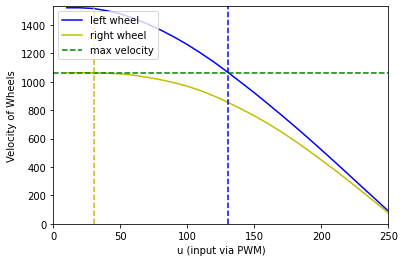

In [2]:
left_jolt, right_jolt = utils.find_jolt()
print('int left_jolt = {};\nint right_jolt = {};'.format(left_jolt, right_jolt))

<a id='part2'></a>

# <span style="color:navy">Part 2: Closed-Loop Control</span>
----


<a id='part20'></a>
## 2.0 Closed Loop Design

We can build a closed loop controller that uses feedback to ensure that both wheels drive at the same velocity. The controller has 2 inputs, namely the desired velocity and the difference between the wheel distances $\delta[k] = d_L[k] - d_R[k]$.

#### 1. Please make sure you have read the <a href="https://drive.google.com/file/d/1zy81idICgFufpy6I75Oo-IT1pDdoJRcG/view?usp=sharing">the note </a> before you begin. You may also find it helpful to read <a href="https://inst.eecs.berkeley.edu/~ee16b/fa17/proj/controls-primer.pdf">this PDF</a> for the derivation of the closed-loop system and its eigenvalue.

#### 2. Now derive the closed loop update equation for the differences $\delta[k]$ corresponding to your controller. Save this somewhere, as you will use it in your report.

Now that we've derived the model, we can begin implementing it. Fill in the two functions below.

In [3]:
# YOUR PARAMETERS HERE
theta_left = ...;
theta_right = ...;
beta_left = ...;
beta_right = ...;
v_star = ...;

simulator = utils.Simulator(theta_left, theta_right, beta_left, beta_right)

In [4]:
# DESIGN YOUR CLOSED-LOOP CONTROL HERE
def drive_straight_left_cl(v_star, delta):
    """Returns the closed loop input 'u' for the left wheel"""
    # YOUR CODE HERE
    return ...

def drive_straight_right_cl(v_star, delta):
    """Returns the closed loop input 'u' for the right wheel"""
    # YOUR CODE HERE
    return ...

<a id='part21'></a>
## 2.1 Closed Loop Simulation and K-Value Selection

Next we need to choose values for the control gains so that the $\delta[k]$ update equation is stable. There should be a range of parameter values that make it stable, so we can tune the gains to get the desired performance.

The first plot below shows the car's performance given a model that exactly matches the physical car. In this case, $\delta$ converges to 0. The second plot shows that under model mismatch, $\delta$ actually converges to a nonzero value, $\delta_{ss}$. **Remember the car is still traveling straight in this scenario.** At this value, the turning effect of the terms $-k_L\delta_{ss}/\theta_R$ and $k_R\delta_{ss}/\theta_R$ in the closed-loop equations cancel out the turning effect of the model error.

<span style='color:#ba190f'>**Try the 5 different sets of gains below and see the effect of each.**</span>

TypeError: unsupported operand type(s) for *: 'ellipsis' and 'int'

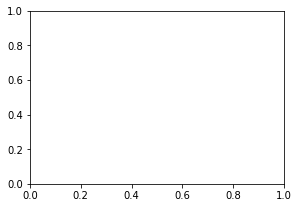

In [5]:
k_left, k_right = None, None
steady_state_error = None

# Maps description of k_values to (k_left, k_right)
k_values = {
    "marginally stable": (-0.3, 0.3),
    "stable, corrects error in one step": (0.5, 0.5),
    "oscillatory, marginally stable": (1, 1),
    "oscillatory, unstable": (1.1, 1.1),
    "stable": (0.2, 0.2),
    "chosen k values": (..., ...)  # TODO: record your chosen k-values here
}

for key in k_values:
    k_left, k_right = k_values[key]

    titles = ["Closed-loop control with perfect model",
              "Closed-loop control with model mismatch, kL={}, kR={}".format(k_left, k_right)]
    _, delta = utils.two_sims(titles, simulator, v_star, drive_straight_left_cl, drive_straight_right_cl)

    print("kL={}, kR={}".format(k_left, k_right))
    print("Eigenvalue of system: 1-kL-kR={:.2g}; {}".format(1-k_left-k_right, key))
    plt.show()
    steady_state_error = delta[-1]

<a id='part22'></a>
## 2.2 Closed Loop Implementation

Now implement the controller on the Launchpad. The sketch **`closed_loop.ino`** contains some code that implements the closed loop control. 

- Fill out `CODE BLOCK CON1` with your control gains **`k_left`** and **`k_right`** as well as your theta, beta, and v_star values from System ID.
- Fill out `CODE BLOCK CON2` with your closed-loop control scheme.
- Fill out `CODE BLOCK CON0` in the body of the loop function to calculate the control inputs. Inspect this code to see how the control system is implemented. For now, ignore the term `delta_ss`, as it's currently set to 0.
- Upload the sketch to your LaunchPad.
    - Make sure that the car is suspended above the desk. Your car wheels are going to move in this step.
    - Check that the wheels are moving as you expect them to.
    - If you use your hand to put some friction on the wheels, does the feedback correct for it?

Once you are satisfied that your motors work and your closed-loop control is implemented, run the car on the ground. If it behaves erroneously (for example the controller oscillates), try different eigenvalues. Our simulations compare our possibly mismatched linear model with a linear approximation of our car. In reality, the car is a nonlinear system.

**Note:** It's possible that the car curves *slightly* over long distances, even if it the car thinks it's traveling straight. This can be due to factors such as mechanical differences past the shaft of the motor, including slight variation in wheel size or wheel wobble. We can fix this after we make the car turn.

<span style='color:#ba190f'>**What are some reasons why the simulation might behave differently from the car? What about the differences between when the car is on the ground versus when it is on the desk?**</span>

<a id='part23'></a>
## 2.3 K-Value Tuning

How did the car behave? It probably didn't go perfectly straight with the first set of k values that you picked. In order to find the "right" k values, we will need to analyze the behavior of our car. Recall in lecture that we learned about how the control values will affect the convergence of a system.


![](https://upload.wikimedia.org/wikipedia/commons/c/c0/Change_with_Ki.png)

The above plot can be summarized as:
- if k is too small, it takes a long time to converge to our desired solution
- if k is too big, oscillations happen

We can use this information to help guide us to k values that get our car going straight. Check out this youtube playlist if you need some examples of what each case could look like: https://www.youtube.com/playlist?list=PLQ1OVCqw6RUPgCmv8H6y9qbcMBT8lotDt

You will likely have to try several sets of k values until you find one that works well with your particular car. If you find yourself having a lot of trouble narrowing in on some, ask your GSI for help!

<a id='part24'></a>

## 2.4 Steady State Error Correction

Lastly, what if we want the car to travel in (approximately) the same direction as when it starts moving? We can manually add the known steady state error $\delta_{ss}$ to each calculation of the error $\delta$. Accounting for the known $\delta_{ss}$ helps the model better respond to unexpected pertubations affecting $\delta$ which increases the model's control strength.

We now calculate $\delta[k]=d_L - d_R + \delta_{ss}$.


TypeError: unsupported operand type(s) for *: 'ellipsis' and 'float'

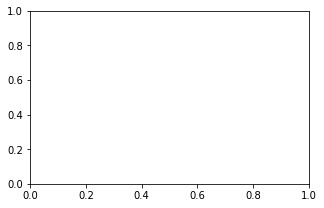

In [6]:
plt.figure(figsize=(5, 7))
plt.subplot(211)
# Simulate using steady_state_error
d = simulator.simulate(
    v_star, drive_straight_left_cl, drive_straight_right_cl, mismatch_error=0.1, offset=steady_state_error)
delta = simulator.plot(d)
plt.title("Closed loop control with model mismatch and\nsteady state error correction, kL={}, kR={}"
          .format(k_left, k_right))
plt.subplot(212)
plt.plot(delta, 'r')
plt.ylabel('delta')

- `closed_loop.ino` collects data as it runs, including $\delta[k]$.
    - Let the car run until it settles to (approximately) straight.
    - Switch off the motors and plug the MSP into your computer.
    - Close the serial monitor (if it's open), and reopen the serial monitor.
- Note the steady-state value $\delta_{ss}$.
    - The first column of the printed data is $\delta$ over time.
    - **If $\delta$ doesn't reach steady-state, the car is not going straight according to the sensors.**
        - It's okay if it isn't exactly constant.
        - Just be sure the variation is small in proportion to the average value.

## Implementing Steady State Error Correction

- Input your value of $\delta_{ss}$ in `CODE BLOCK CON3` in **`closed_loop.ino`**.
- Convince yourself that we need to *add* this value in `CODE BLOCK CON0`.

For example, if the car drives straight but turned right from its initial heading, we want the right wheel to farther so it turns back towards the left. Adding a positive number to delta accomplishes this.

<a id='part3'></a>

# <span style="color:navy">Part 3 (OPTIONAL): Open-Loop Comparison</span>
----

To compare your control scheme to an open-loop model, you can set both of your K-values to zero. Try running your car with K-values of zero. Does your car behave similarly? Does it go straight?

Why do you think you see the behavior you see?

<a id='part4'></a>

# <span style="color:navy">Part 4: Turning</span>
-----
<a id='part40'></a>
## 4.0 Analyzing A Turn

#### We want to turn with a specific radius.  What open-loop control input would lead to turning?  
During open-loop control, we sought to drive the car straight at our desired velocity $v^*$.  

We used our model of the car ($\theta$, $\beta$) to calculate the open-loop control input which drives the car straight in the absence of perturbations:  

$$u^{OL}_L = \frac{v^*+\beta_L}{\theta} $$
$$u^{OL}_R = \frac{v^*+\beta_R}{\theta} $$

Is it possible to calculate an open-loop control input which would result in turning with a desired radius?

#### We have been turning during Closed-loop Control!

We can get a clue about turning by considering how we did closed-loop control. We perform feedback control of SIXT33N in order to minimize the difference between the two wheels ($\delta[k] = d_L[k] - d_R[k]$). When perturbations cause one wheel to get ahead of the other resulting in non-zero $\delta$, feedback control turns the car to correct the error.  

Let's walk through this.  

Our feedback control policy is: 
$$u_L[k] = u_L^{OL} - \frac{k_L}{\theta_L}\delta[k]$$

$$u_R[k] = u_R^{OL} + \frac{k_R}{\theta_R}\delta[k]$$


Let's say the right wheel has moved further than the left ($d_R[k] > d_L[k]$), resulting in a negative $\delta[k]$. A negative $\delta[k]$ results in a reduction of $u_R[k]$, and an increase of $u_L[k]$. But what does this mean physically?

If the right wheel is getting ahead of the left one, the left wheel will need to move a little faster and the right wheel a little slower for the wheels to even back out. Thus, feedback control corrects errors by turning to compensate for them.  

So $\delta \ne 0$ can be used to turn the car. Let's get more precise.  

### Turning via reference tracking

We would like the car to turn with a specified radius $r$ and speed $v^*$. The controller's unit for distance is encoder ticks, but each tick is approximately 1 cm of wheel circumference.

To turn, we want $\delta$ to change at a particular rate. Without loss of generality, we'll analyze a right turn, corresponding to increasing $\delta$. For a left turn, we simply negate $\delta$. Our goal is to generate a reference from the desired $r$ and $v^*$ for the controller to follow. This reference will be a function of the controller's time-step.

Use the following variables:
- $k$ - time-step
- $r$ [cm] - turn radius of the center of the car; 1 cm ~ 1 encoder tick
- $d$ [ticks] - distance traveled by the center of the car
- $l$ [cm] - distance between the centers of the wheels; 1 cm ~ 1 encoder tick
- $\omega$ [rad/tick] - angular velocity
- $\theta$ [rad] - angle traveled

Inspect the following diagram:

<center>
<img width="400px" src="images/turning_figure.png">
</center>



#### From this geometry, can you write $\delta[k]$ in the following form?
$$\delta[k] = f(r,v^*,l,k)$$

<h3><span style='color:#ba190f'>Check your answer with the lab staff!</span></h3>

`YOUR ANSWER HERE`

<a id='part41'></a>

## 4.1 Implementing Turns

### A note on sampling periods 
 
In our implementation, the control loop and the data collection have different periods, $T_c$ and $T_d$ respectively.  $T_d$ is an integer multiple of $T_c$: $m=\frac{T_d}{T_c} \in \mathbb{Z}^{+}$
 
The units of $v^*$ are [ticks/$T_d$] and the units of $k$ are [seconds/$T_c$]
 
We use $T_c=100$ms, $T_d=500ms$, so $m=5$.

**<span style='color:#ba190f'> Replace $v^*$ with $\frac{v^*}{m}$ [ticks/$T_c$]</span>**


### Implementation
- Open `turning.ino`.
- Copy the required code from `closed_loop.ino` into **`CODE BLOCK CON1/2/3`**
    - Make sure to update pin numbers if you've made changes.
    - Setting `delta_ss` helps your car's driving converge to straight sooner!
- **Complete the function `delta_reference` in `CODE BLOCK CON4`**.
    - Look at `CODE BLOCK CON0` to see how this is used!
    - Use the variables `TURN_RADIUS`, `v_star`, `CAR WIDTH`, and `k`.
    - `delta_ss` is used in `CODE BLOCK CON0`, so don't include it here.
- Change the array of run times so the car goes straight for a longer distance, left, straight for a shorter distance, and right for the duration you want.

When you're done, try it out! SIXT33N should go straight, turn left, go straight, and turn right with a stop between each stage. It's ok if SIXT33N does not turn 90 degrees - as long as it turns you should be fine. Just make sure that it is clear when SIXT33N is turning, and when it is driving straight.


<a id='part42'></a>
## 4.2 Correcting Mechanical Errors

At this stage, your car may already go perfectly straight and turn left and right equally. However, some cars may not go quite straight even when both encoder measurements are exactly the same. This can be caused by mechanical issues such as axle wobble or mismatch in the wheel sizes. In this case, the car thinks it's driving straight, so it's the best we can do using just the sensors in our control system.

If the car is consistently turning slightly instead of driving straight, we can correct it by instructing the car to slightly turn in the opposite direction. 

**If you think your car could benefit from this, implement the function `straight_correction` in `CODE BLOCK CON5` using the variable `STRAIGHT_RADIUS`.**


In the final phase of the project, you will integrate all of the parts and control SIXT33N with your voice.





# <span style="color:#ba190f">CHECKOFF</span>
-----

Show your GSI that your car moves in a straight line and turns gracefully. Your GSI will also check your block diagram and k values.


### <span style="color:#ba190f">DON'T FORGET TO SAVE ALL YOUR DATA AND WORK!</span>